<h1>Final Project - IMDB 5000 Movie Dataset & Analysis (Continuing Mid-Term Project)
</h1>    

<i>Brian Hayes - 12/10/2019 </i> (Move to part 7 for new material relevant to final project, parts 1-6 were for Mid-Term.)


<b>K-State Honor Code: "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work." 
    -Brian Hayes  </b>
    
    

<h2>Part 1 - Business Understanding </h2>

Movie success can be determined in a number of ways. One could look at box office performance, critical reception, or awards won. Another metric that can be used is the IMDB rating, which I will use as the primary performance metric in this analysis. The ability to predict movie success would be very important to various production companies to assist them in making their investments successful. Movies can be very expensive to make, so ensuring they are popular with moviegoers is essential to the success of the industry.

Many factors and metrics can be used when attempting to discover which are most critical to ensuring a movie is successful. This analysis will seek to uncover which of these factors and metrics are most significant for a movie to end up with a high IMDB score. Once discovered, production companies can use these metrics to make their movies more successful. 
    

<h2> Part 2 - Data Understanding </h2>

Here we begin by importing our data analysis tools:

In [144]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

import statsmodels.api as sm
from statsmodels.formula.api import ols
from yellowbrick.regressor import ResidualsPlot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

Next, we read in the data and take a look at it:

In [3]:
df = pd.read_csv("movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Now we can begin to look more closely at the data structure and types:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

The information provided to us using the .info section of code is very englightening. We have 28 columns of data, with a mixture of text and numerical values. Some of these numerical values are integers and some are floats. It is also obvious that we have different amounts of values in each column, which means we have some missing values that we must deal with.

Before dealing with missing values, however, we need to remove duplicate data:

In [5]:
len(df[df.duplicated()])

45

In [6]:
len(df)

5043

In [7]:
df = df.drop_duplicates(keep='last')

In [8]:
len(df)

4998

In [9]:
len(df[df.duplicated()])

0

In the code above, we found the amount of duplicates, then dropped them, then checked the amount of duplicates and length of the dataset after dropping them to ensure they were removed.

Now we must deal with the issue of genre. Many movies have more than one genre, making this part of the code difficult to analyze.

In [10]:
g=df[['genres','imdb_score']]
g.head()

,genres,imdb_score
0,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Action|Adventure|Fantasy,7.1
2,Action|Adventure|Thriller,6.8
3,Action|Thriller,8.5
4,Documentary,7.1


In [11]:
b = pd.DataFrame(g.genres.str.split('|').tolist(), index=g.imdb_score).stack()
b = b.reset_index()[[0, 'imdb_score']] # genres variable is currently labeled 0
b.columns = ['genres', 'imdb_score'] # renaming genres
b.head()

,genres,imdb_score
0,Action,7.9
1,Adventure,7.9
2,Fantasy,7.9
3,Sci-Fi,7.9
4,Action,7.1


In [12]:
b.groupby('genres').size().sort_values(ascending=False)

genres
Drama          2571
Comedy         1862
Thriller       1396
Action         1143
Romance        1098
Adventure       914
Crime           883
Sci-Fi          611
Fantasy         604
Horror          556
Family          544
Mystery         493
Biography       292
Animation       242
Music           212
War             211
History         205
Sport           181
Musical         132
Documentary     121
Western          94
Film-Noir         6
Short             5
News              3
Reality-TV        2
Game-Show         1
dtype: int64

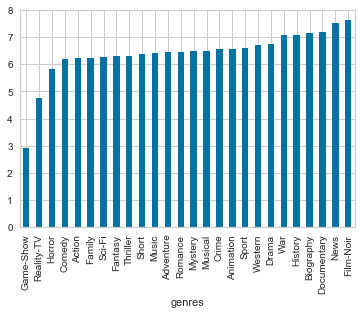

In [13]:
b.groupby('genres')['imdb_score'].mean().sort_values().plot(kind='bar')

Now we have a new dataset with each genre assigned to it's associated imdb score. As seen on the graph, there doesn't appear to be a significant correlation between imdb score and genre. Most values are in the 6-7.5 range. The values that fall outside this range have occur very infrequently in the dataset, so it's hard to draw a conclusion on them. For instance, the "Game-Show" genre has a score around 3, but only shows up once. We will remove genres from the larger dataset.

Note - this analysis of genre largely follows the logic of Yueming Zhang's project found here, section 2.4: http://rstudio-pubs-static.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html#data-cleaning

Dropping the genres column:

In [14]:
df = df.drop('genres', axis=1)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Here, I will look at whether the "color" column should be dropped:

We will also drop the year column in the next section of code. The year column may be useful for analzying historical trends of movies, but is not useful for predicting future movie success. Movie production companies cannot arbitrarily change the year of production to improve imdb score.

In [15]:
df = df.drop('title_year', axis=1)
df.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,393.0,6.8,2.35,85000


Finally, we will examine the aspect ratio column to see if it should be removed. It doesn't seem like something that would affect movie success, but we will make sure:

In [16]:
df.groupby('aspect_ratio')['imdb_score'].size().sort_values()

aspect_ratio
1.18        1
1.20        1
1.44        1
1.77        1
1.89        1
2.24        1
2.55        2
1.50        2
2.76        3
2.40        3
1.75        3
2.00        5
4.00        7
2.20       14
2.39       15
16.00      45
1.66       64
1.33       67
1.37      100
1.78      108
1.85     1890
2.35     2337
Name: imdb_score, dtype: int64

This shows that the most popular aspect ratios are 1.85 and 2.35.

Here we will group each category of aspect ratio to analyze:

In [17]:
df_185 = df.loc[df['aspect_ratio'] == 1.85]
df_235 = df.loc[df['aspect_ratio'] == 2.35]
df_other = df.loc[(df['aspect_ratio'] != 1.85) & (df['aspect_ratio'] != 2.35)]

In [18]:
df_185.head(2) # confirming it worked

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,553.0,7.8,1.85,29000
19,Color,Barry Sonnenfeld,451.0,106.0,188.0,718.0,Michael Stuhlbarg,10000.0,179020854.0,Will Smith,Men in Black 3,268154,12572,Nicole Scherzinger,1.0,alien|criminal|m.i.b.|maximum security prison|...,http://www.imdb.com/title/tt1409024/?ref_=fn_t...,341.0,English,USA,PG-13,225000000.0,816.0,6.8,1.85,40000


In [19]:
df_235.head(2) #confirming it worked

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,393.0,6.8,2.35,85000


In [20]:
df_other.head() #confirming it worked

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,936.0,7.9,1.78,33000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2000.0,7.0,2.00,150000
84,Color,Roland Joffé,10.0,109.0,596.0,283.0,Alice Englert,622.0,NaN,Tamsin Egerton,The Lovers,2138,1982,Bipasha Basu,3.0,1770s|british india|great barrier reef|india|ring,http://www.imdb.com/title/tt1321869/?ref_=fn_t...,15.0,English,Belgium,R,NaN,525.0,4.5,NaN,677
88,Color,Brad Bird,443.0,130.0,663.0,604.0,Chris Bauer,2000.0,93417865.0,Judy Greer,Tomorrowland,128306,5046,Thomas Robinson,2.0,boy genius|futuristic city|inventor|teenage gi...,http://www.imdb.com/title/tt1964418/?ref_=fn_t...,497.0,English,USA,PG,190000000.0,638.0,6.5,2.20,37000


In [21]:
df_185['imdb_score'].mean()

6.370740740740756

In [22]:
df_235['imdb_score'].mean()

6.478177150192558

In [23]:
df_other['imdb_score'].mean()

6.500907911802857

After grouping each category of aspect ratio together, it is clear there aspect ratio has no meaningful difference on imdb score. This column can safely be removed.

Note - this analysis of genre largely follows the logic of Yueming Zhang's project found here, section 3.1.2: http://rstudio-pubs-static.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html#data-cleaning

In [24]:
df = df.drop('aspect_ratio', axis=1)
df.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,936.0,7.9,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,5000.0,7.1,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,393.0,6.8,85000


<h2>Part 3 - Data Preparation </h2>

To being part 3 of our analysis, we will deal with missing values:

In [25]:
df.isnull().sum()

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       487
actor_2_facebook_likes        13
imdb_score                     0
movie_facebook_likes           0
dtype: int64

The code above shows that we have a lot of missing values. Now, we must decide what to do with them.

Categories such as gross and budget are too important for our analysis, so we cannot simply remove the column. Instead, we must remove the rows with a null value in this category. Here is that code:

In [26]:
df = df.dropna(subset=['gross'])

In [27]:
df = df.dropna(subset=['budget'])
df.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
actor_2_facebook_likes        5
imdb_score                    0
movie_facebook_likes          0
dtype: int64

After removing budget and gross, we still have 51 values in the content_rating category with no value. I would like to analyze rating later on, so I will remove these values too.

In [28]:
df = df.dropna(subset=['content_rating'])
df.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        6
actor_2_name                  2
actor_1_facebook_likes        1
gross                         0
actor_1_name                  1
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  6
facenumber_in_poster          6
plot_keywords                21
movie_imdb_link               0
num_user_for_reviews          0
language                      2
country                       0
content_rating                0
budget                        0
actor_2_facebook_likes        2
imdb_score                    0
movie_facebook_likes          0
dtype: int64

Now we will create some useful new variables. First up is profit:

In [29]:
df['Profit'] = df['gross'] - df['budget']
df.head(1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,936.0,7.9,33000,523505847.0


Next is return on investment, or ROI.

In [30]:
df['ROI'] = df['Profit']/df['budget']
df.head(1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit,ROI
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,936.0,7.9,33000,523505847.0,2.208885


We also need to transform a the content-rating variable. We need to convert this to a number format. The code is below:

In [31]:
df['content_rating'] = df['content_rating'].map({'G': 1, 'PG': 2, 'PG-13':3, 'R':4})
df.head(1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit,ROI
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,3.0,237000000.0,936.0,7.9,33000,523505847.0,2.208885


Now we are ready to move on the Business Intelligence and Correlation Analysis portions of the project.

<h2>Part 4 - Business Intelligence </h2>

Now it's time to do some analysis. I'll begin by visualizing part of the data to get a better sense of what's going on.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F114417710>]],
      dtype=object)

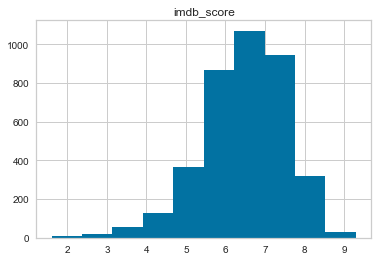

In [32]:
df.hist('imdb_score')

The imdb scores seem to have a bell-curve sort of shape. It seems like an "average" score for a movie is around 6 to 7.

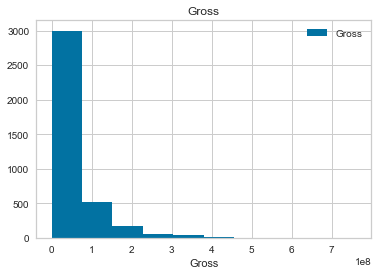

In [33]:
plt.hist(df['gross'], label= 'Gross')
plt.xlabel('Gross')
plt.title('Gross')
plt.legend();

Most movies are in the same general ballpark for gross revenue, but there are a few that made an order of magnitude more money.

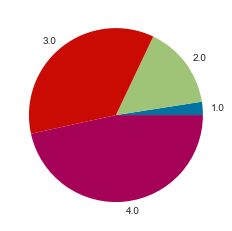

In [34]:
content_rating = df.groupby('content_rating').size().reset_index()
plt.pie(content_rating[0], labels=content_rating['content_rating']);

Here's a pie plot breaking down content rating. Remember that G is 1, PG is 2, PG-13 is 3, and R is 4. I'm pretty surprised to see rated R movies so prevalent in the dataset.

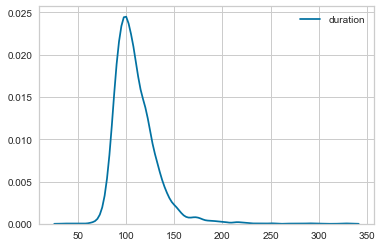

In [35]:
sns.kdeplot(df.duration);

Most movies seem to be around the 100 minute mark. That's not as smooth of a distribution as I was expecting. If most movies are around the same range, duration may not have a huge impact on imdb score.

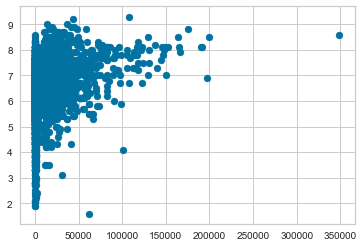

In [36]:
plt.scatter(df['movie_facebook_likes'], df['imdb_score']);

There does seem to be a generally positive relationship between facebook likes and imdb score.

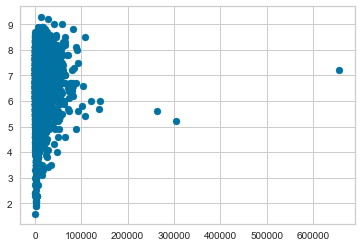

In [37]:
plt.scatter(df['cast_total_facebook_likes'], df['imdb_score']);

There may be a slight positive correlation between cast facebook likes and movie imdb score, but not much.

-------------------------------------------------------------------------------------------------------------

Now I'll begin some groupby analysis to try and see why certain movies have higher imdb scores than others. I'm going to avoid doing this with the numerical variables because I can do a correlation analysis later on. That should be much easier and more enlightening. I'll focus here on values I can't convert to a number value, like director and actor.

I'll start by making 2 groups: one with great movies, and one with terrible movies (according to imdb score).

In [38]:
df_high = df.loc[df['imdb_score'] > 8]
df_low = df.loc[df['imdb_score'] < 4.5]

In [39]:
len(df)

3806

In [40]:
len(df_high)

158

In [41]:
len(df_low)

164

Now we will group by director name to see if there are some directors with lots of great or bad movies.

In [42]:
df_high.groupby('director_name')['imdb_score'].size().sort_values(ascending=False).head()

director_name
Christopher Nolan    7
Martin Scorsese      6
Quentin Tarantino    5
Steven Spielberg     5
Ridley Scott         4
Name: imdb_score, dtype: int64

In [43]:
df_low.groupby('director_name')['imdb_score'].size().sort_values(ascending=False).head()

director_name
Jason Friedberg          4
Uwe Boll                 3
Robert Rodriguez         3
Peter Chelsom            2
Brian Trenchard-Smith    2
Name: imdb_score, dtype: int64

So, if you want a good movie made, it's a good idea to pick someone from the first list, and definitely not the second. But this isn't completely foolproof, what if one of those directors has made 100 movies, and only created a few with a high score? - That would be a low success rate. Or the same for the second group, with only a few of those movies with a low score - that could mean a high success rate. We need to make sure this isn't the case. 

In [44]:
df_direc_count = df.groupby('director_name').size().sort_values(ascending=False)
df_direc_count = df_direc_count.reset_index()

In [45]:
df_direc_count.head()

,director_name,0
0,Steven Spielberg,25
1,Woody Allen,19
2,Clint Eastwood,19
3,Ridley Scott,17
4,Martin Scorsese,16


In [46]:
 df_direc_count = df_direc_count.rename(columns={0: "Count"})

In [47]:
df_direc_count.head()

,director_name,Count
0,Steven Spielberg,25
1,Woody Allen,19
2,Clint Eastwood,19
3,Ridley Scott,17
4,Martin Scorsese,16


The above code has given us each director and their number of movies directed in 1 dataframe. The code below will sort out everyone with fewer than 5 movies made.

In [48]:
df_direc_count5= df_direc_count[df_direc_count.Count >= 5]

The join below will merge the directors with more than 5 movies made with our main dataset. This will eliminate those with under 5 movies made. Then we can sort by average imdb score.

In [49]:
df_success_director = df.merge(df_direc_count5, on='director_name', how='inner')
df_success_director.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit,ROI,Count
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,3.0,237000000.0,936.0,7.9,33000,523505847.0,2.208885,7
1,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,3.0,200000000.0,14000.0,7.7,26000,458672302.0,2.293362,7
2,Color,James Cameron,210.0,153.0,0.0,539.0,Jenette Goldstein,780.0,204843350.0,Joe Morton,Terminator 2: Judgment Day,744891,2829,S. Epatha Merkerson,0.0,future|liquid metal|multiple cameos|sexy woman...,http://www.imdb.com/title/tt0103064/?ref_=fn_t...,983.0,English,USA,4.0,102000000.0,604.0,8.5,13000,102843350.0,1.008268,7
3,Color,James Cameron,94.0,141.0,0.0,618.0,Tia Carrere,2000.0,146282411.0,Jamie Lee Curtis,True Lies,190439,4528,Tom Arnold,0.0,espionage|secret agent|secret mission|spy|spy ...,http://www.imdb.com/title/tt0111503/?ref_=fn_t...,351.0,English,USA,4.0,115000000.0,1000.0,7.2,0,31282411.0,0.272021,7
4,Color,James Cameron,82.0,171.0,0.0,638.0,Todd Graff,2000.0,54222000.0,Michael Biehn,The Abyss,131217,4074,Mary Elizabeth Mastrantonio,0.0,alien|estranged couple|ocean|submarine|underwater,http://www.imdb.com/title/tt0096754/?ref_=fn_t...,380.0,English,USA,3.0,69500000.0,650.0,7.6,0,-15278000.0,-0.219827,7


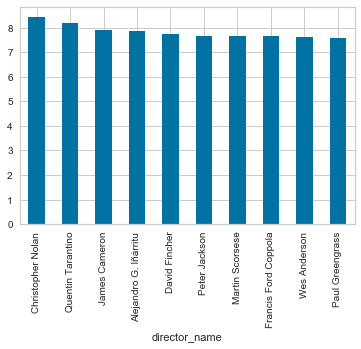

In [50]:
df_success_director.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False).head(10).plot(kind='bar');

There we have it, these 10 directors above have the highest average imdb score of those with more than 5 movies made. If you were a production company, you'd want to hire one of these people to direct your movie. We can also run this again and sort differently, showing us the worst directors. You would not want to hire them. The code is below:

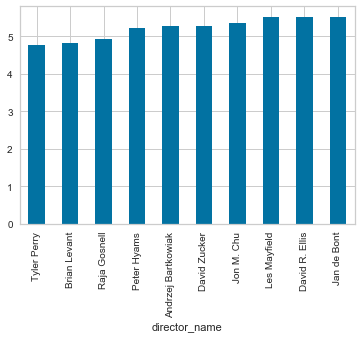

In [51]:
df_success_director.groupby('director_name')['imdb_score'].mean().sort_values().head(10).plot(kind='bar');

Next, I'll be looking at actors, using mostly the same method. We'll start with main actors.

In [52]:
df_actor1_count = df.groupby('actor_1_name').size().sort_values(ascending=False)
df_actor1_count = df_actor1_count.reset_index()

In [53]:
df_actor1_count.head()

,actor_1_name,0
0,Robert De Niro,42
1,Johnny Depp,38
2,J.K. Simmons,31
3,Nicolas Cage,30
4,Denzel Washington,30


In [54]:
 df_actor1_count = df_actor1_count.rename(columns={0: "Count"})

In [55]:
df_actor1_count.head()

,actor_1_name,Count
0,Robert De Niro,42
1,Johnny Depp,38
2,J.K. Simmons,31
3,Nicolas Cage,30
4,Denzel Washington,30


The above code has given us each main actor and their number of movies in 1 dataframe. The code below will sort out everyone with fewer than 5 movies made.

In [56]:
df_actor1_count5= df_actor1_count[df_actor1_count.Count >= 5]

The join below will merge the main actors with more than 5 movies made with our main dataset. This will eliminate those with under 5 movies made. Then we can sort by average imdb score.

In [57]:
df_success_actor1 = df.merge(df_actor1_count5, on='actor_1_name', how='inner')
df_success_actor1.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit,ROI,Count
0,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,3.0,300000000.0,5000.0,7.1,0,9404152.0,0.031347,38
1,Color,Gore Verbinski,313.0,151.0,563.0,1000.0,Orlando Bloom,40000.0,423032628.0,Johnny Depp,Pirates of the Caribbean: Dead Man's Chest,522040,48486,Jack Davenport,2.0,box office hit|giant squid|heart|liar's dice|m...,http://www.imdb.com/title/tt0383574/?ref_=fn_t...,1832.0,English,USA,3.0,225000000.0,5000.0,7.3,5000,198032628.0,0.880145,38


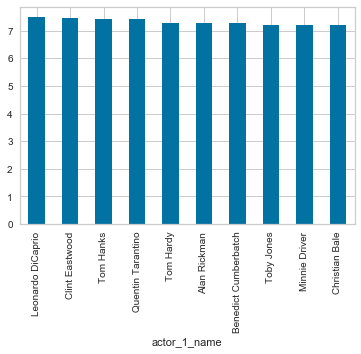

In [58]:
df_success_actor1.groupby('actor_1_name')['imdb_score'].mean().sort_values(ascending=False).head(10).plot(kind='bar');

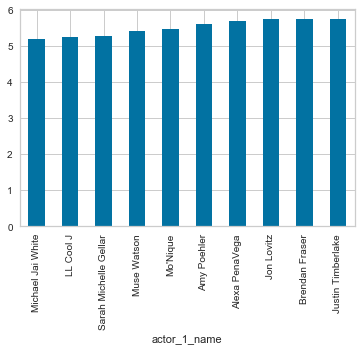

In [59]:
df_success_actor1.groupby('actor_1_name')['imdb_score'].mean().sort_values().head(10).plot(kind='bar');

Now on to the secondary actors.

In [60]:
df_actor2_count = df.groupby('actor_2_name').size().sort_values(ascending=False)
df_actor2_count = df_actor2_count.reset_index()

In [61]:
df_actor2_count.head(2)

,actor_2_name,0
0,Morgan Freeman,20
1,Charlize Theron,14


In [62]:
 df_actor2_count = df_actor2_count.rename(columns={0: "Count"})

In [63]:
df_actor2_count.head(2)

,actor_2_name,Count
0,Morgan Freeman,20
1,Charlize Theron,14


The above code has given us each second actor and their number of movies in 1 dataframe. The code below will sort out everyone with fewer than 5 movies made.

In [64]:
df_actor2_count5= df_actor2_count[df_actor2_count.Count >= 5]

The join below will merge the second actors with more than 5 movies made with our main dataset. This will eliminate those with under 5 movies made. Then we can sort by average imdb score.

In [65]:
df_success_actor2 = df.merge(df_actor2_count5, on='actor_2_name', how='inner')
df_success_actor2.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit,ROI,Count
0,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,3.0,300000000.0,5000.0,7.1,0,9404152.0,0.031347,7
1,Color,Gore Verbinski,313.0,151.0,563.0,1000.0,Orlando Bloom,40000.0,423032628.0,Johnny Depp,Pirates of the Caribbean: Dead Man's Chest,522040,48486,Jack Davenport,2.0,box office hit|giant squid|heart|liar's dice|m...,http://www.imdb.com/title/tt0383574/?ref_=fn_t...,1832.0,English,USA,3.0,225000000.0,5000.0,7.3,5000,198032628.0,0.880145,7


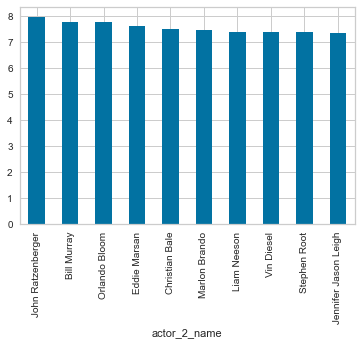

In [66]:
df_success_actor2.groupby('actor_2_name')['imdb_score'].mean().sort_values(ascending=False).head(10).plot(kind='bar');

Above are the best 2nd actors, and below are the worst.

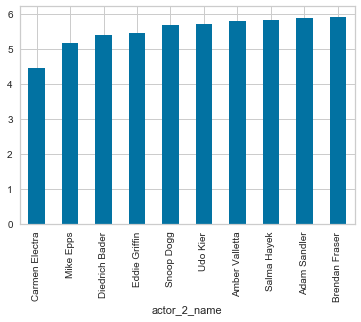

In [67]:
df_success_actor2.groupby('actor_2_name')['imdb_score'].mean().sort_values().head(10).plot(kind='bar');

Now on to the 3rd actors.

In [68]:
df_actor3_count = df.groupby('actor_3_name').size().sort_values(ascending=False)
df_actor3_count = df_actor3_count.reset_index()

In [69]:
df_actor3_count.head(2)

,actor_3_name,0
0,Steve Coogan,8
1,Kirsten Dunst,7


In [70]:
 df_actor3_count = df_actor3_count.rename(columns={0: "Count"})

In [71]:
df_actor3_count.head(2)

,actor_3_name,Count
0,Steve Coogan,8
1,Kirsten Dunst,7


The above code has given us each third actor and their number of movies in 1 dataframe. The code below will sort out everyone with fewer than 5 movies made.

In [72]:
df_actor3_count5= df_actor3_count[df_actor3_count.Count >= 5]

The join below will merge the third actors with more than 5 movies made with our main dataset. This will eliminate those with under 5 movies made. Then we can sort by average imdb score.

In [73]:
df_success_actor3 = df.merge(df_actor3_count5, on='actor_3_name', how='inner')
df_success_actor3.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit,ROI,Count
0,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,3.0,258000000.0,11000.0,6.2,0,78530303.0,0.304381,7
1,Color,Sam Raimi,300.0,135.0,0.0,4000.0,James Franco,24000.0,373377893.0,J.K. Simmons,Spider-Man 2,411164,43388,Kirsten Dunst,1.0,death|doctor|scientist|super villain|tentacle,http://www.imdb.com/title/tt0316654/?ref_=fn_t...,1303.0,English,USA,3.0,200000000.0,11000.0,7.3,0,173377893.0,0.866889,7


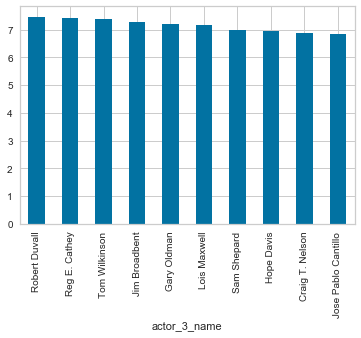

In [74]:
df_success_actor3.groupby('actor_3_name')['imdb_score'].mean().sort_values(ascending=False).head(10).plot(kind='bar');

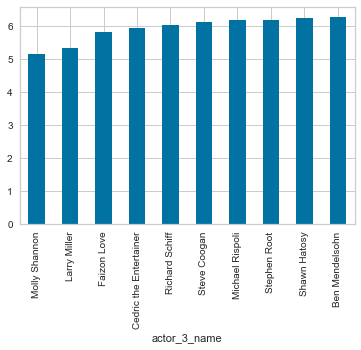

In [75]:
df_success_actor3.groupby('actor_3_name')['imdb_score'].mean().sort_values().head(10).plot(kind='bar');

This is a lot of data to look through, but what is important to note is that actor choice does matter. There is a clear and significant difference between the top and bottom actors in each role (main, 2nd, 3rd). Movie production companies would be wise to seek out actors in the top 10 of each of these lists. I also noticed many of the names on each list and some conclusions can be drawn from those as well. Many of the names in the bottom 10 lists for each categories have careers outside of acting, such as music or comedy. The names in the top 10 lists generally focus more on acting. Movie production companies would be better served targeting full-time actors to act in their movies.

<h2>Part 5 - Correlation Analysis </h2>

First we will run a basic correlation analysis looking at all numerical variables:

In [76]:
df.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit,ROI
num_critic_for_reviews,1.000000,0.237988,0.177836,0.247274,0.168785,0.469091,0.596866,0.237375,-0.034445,0.568970,0.076517,0.106570,0.254052,0.349083,0.702661,0.038012,0.032769
duration,0.237988,1.000000,0.181681,0.123003,0.085880,0.250522,0.345177,0.121234,0.027864,0.357779,0.099372,0.069353,0.128916,0.366329,0.219947,0.008071,-0.032988
director_facebook_likes,0.177836,0.181681,1.000000,0.121721,0.091623,0.141807,0.303852,0.121525,-0.046995,0.220850,0.018990,0.018904,0.119247,0.191921,0.162228,0.024589,-0.006370
actor_3_facebook_likes,0.247274,0.123003,0.121721,1.000000,0.252765,0.282772,0.259370,0.485410,0.104370,0.202895,-0.038628,0.039158,0.550690,0.064969,0.259299,0.047570,-0.012468
actor_1_facebook_likes,0.168785,0.085880,0.091623,0.252765,1.000000,0.145106,0.180137,0.946303,0.059678,0.124409,0.007599,0.016995,0.390381,0.092846,0.128764,0.027468,-0.015725
gross,0.469091,0.250522,0.141807,0.282772,0.145106,1.000000,0.627127,0.230689,-0.032652,0.550847,-0.266239,0.100624,0.245839,0.216599,0.365262,0.205543,0.018460
num_voted_users,0.596866,0.345177,0.303852,0.259370,0.180137,0.627127,1.000000,0.246441,-0.034980,0.781628,0.016665,0.067801,0.241337,0.479026,0.518519,0.124282,0.010230
cast_total_facebook_likes,0.237375,0.121234,0.121525,0.485410,0.946303,0.230689,0.246441,1.000000,0.081518,0.179870,0.000097,0.028893,0.639919,0.105296,0.199730,0.041830,-0.018807
facenumber_in_poster,-0.034445,0.027864,-0.046995,0.104370,0.059678,-0.032652,-0.034980,0.081518,1.000000,-0.081270,0.021803,-0.021879,0.069776,-0.069641,0.014088,0.011595,-0.013430
num_user_for_reviews,0.568970,0.357779,0.220850,0.202895,0.124409,0.550847,0.781628,0.179870,-0.081270,1.000000,0.052702,0.072687,0.187694,0.324276,0.373072,0.096247,0.068256


Not a ton of numbers stand out, and this is hard to read, so let's make it easier to see. I'll use a heatmap for this:

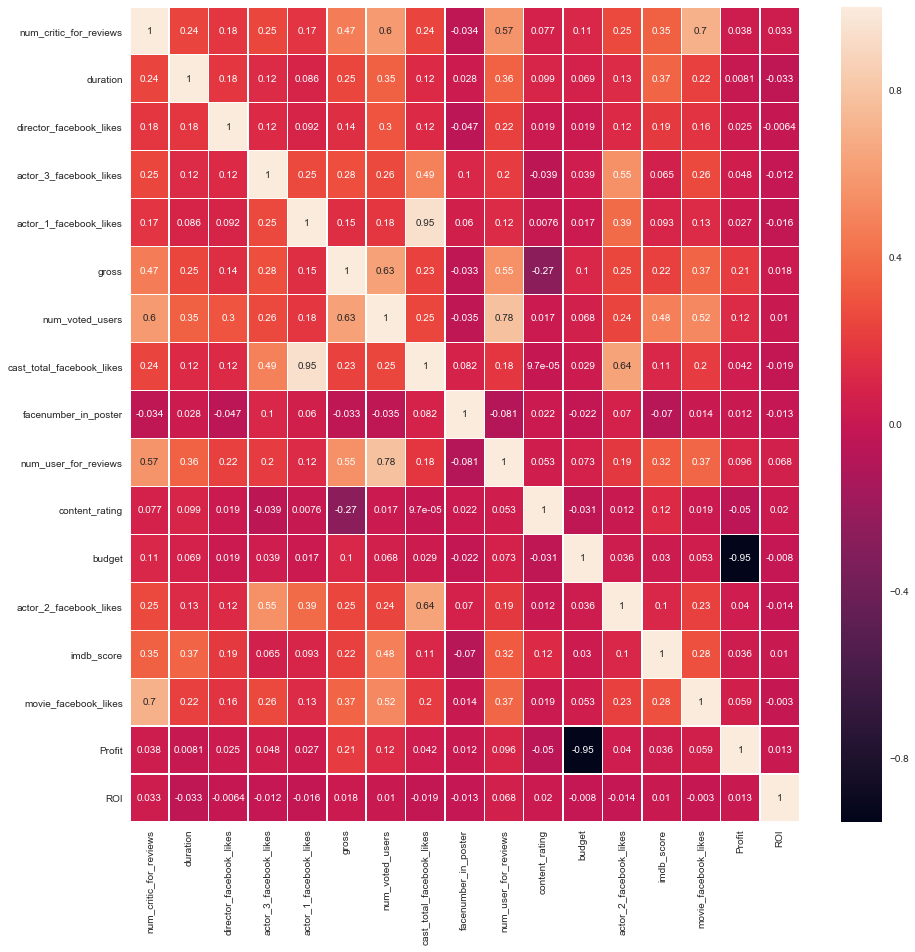

In [77]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df.corr(), annot=True, linewidth=0.5)
#code below is needed to fix borders of heatmap
#ax.get_ylim()
ax.set_ylim(17.0, 0.0);

This is now much easier to read. The lighter the color, the higher the correlation. What's interesting about this data is that there are not many values that indicate a high correlation with imdb scores. At the same time, there's only one variable that has a negative correlation (number of faces in the movie poster). This tells us that generally, the higher you can make each variable (except for number of faces in the movie poster), the better your movie will do on imdb, but none of these variables are a silver bullet. If you had to choose, the variables with the highest correlations are number of critical reviews on imdb, facebook likes, number of user votes, number of user reviews, gross, and duration. 

However, each of these variables minus duration are not very helpful for movie production companies. Many of these correlation values are likely the result of the movie's success, not the cause for it. Duration is interesting to look at because it is intrinsic to the movie itself, which production companies have control over. Facebook likes is also interesting to note because it could be a result of better marketing, but it's also possible it's the result of the movie's intrinsic success, not a cause of it.

The largest takeaway from these variables is that they are not very useful for creating successful movies (with regards to imdb score). Facebook popularity of actors, budget, and profit don't matter very much. Popular and financially successful movies are not necessarily more liked than any other movie.

Aside from looking at causes of imdb score, there are some other variable relationships that are useful to note. Budget and profit, for example, have an extremely negative correlation. This indicates that the lower budget movies have the highest chance for a high profit production. Another noticeable finding is the relationship between actor facebook likes and total facebook likes. The main actor has a .95 correlation with facebook likes, with actors 2 and 3 falling behind. This shows that movies often do have 1 main star, rather than 2 or 3 equally big names.

<h2>Part 6 - Storytelling </h2>

After performing this analysis, I have a pretty good feeling for what factors have the largest impact on a movie's imdb score "success". The factors most important to producing movies with a high imdb score are:
* Director
* Main Actor
* Second Actor
* Third Actor
* Duration

Nothing else in the data comes close. Obviously it's more complicated than just throwing actors and directors together, but if you can secure a director with a long track record of success, your odds of a highly rated movie on imdb are very high. If a company hires a director with a history of failure, it likely won't end well in terms of a rating. The same is true of actors. Production companies should seek out full-time actors with a history of success if they want a successful movie. Movies with a longer duration also have a correlation with higher ratings, which would be interesting to investigate with more data and information.

Other factors, such as budget or facebook popularity of actors, don't have as large of an impact as one would think. Genre may have an impact, but if so, it's small. Regarding money, if movie production companies want to make a movie with a high amount of raw profit, having a high budget isn't a great idea, while return on investment ratio isn't really correlated with budget at all.

In some ways, this project was more telling with regards to what happens when movies are highly rated. Movies that are highly rated have more user reviews, user ratings, critical reviews, and facebook likes. Ideally, this would be useful information, but these values are not intrinsic to movie quality - they're intrinsic to movie popularity - which makes sense. Movies of higher quality will be more likely to be watched, reviewed, and voted on. 

To conclude, the biggest predictor of movie success, according to this data, are the people involved, primarily directors and actors. External factors such as budget or facebook popularity don't move the needle much. Finding ways to make your movie more popular with reviewers and imdb users may help, but it's difficult to tell just how that affects movie success.

<h2> Final Project - Additional Analysis </h2>

Everything above this section is from the mid-term project. Below is the additional analysis required for the final project. The objective of this additional analysis is to create different regression and classification models, along with performing a clustering analysis. The models can be used to predict if movies are good and bad, while clustering analysis can allow for various movie "profiles" to be discovered. 

<h2> Part 7 - Regression </h2>

In [85]:
df.isnull().sum()

color                         1
director_name                 0
num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                  0
actor_1_facebook_likes        0
gross                         0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  0
facenumber_in_poster          0
plot_keywords                18
movie_imdb_link               0
num_user_for_reviews          0
language                      2
country                       0
content_rating                0
budget                        0
actor_2_facebook_likes        0
imdb_score                    0
movie_facebook_likes          0
Profit                        0
ROI                           0
dtype: int64

We have some values with nulls in them. They need to be removed to begin regression analysis.

In [86]:
df = df.dropna(subset=['content_rating'])
df = df.dropna(subset=['facenumber_in_poster'])
df = df.dropna(subset=['actor_2_facebook_likes'])
df = df.dropna(subset=['actor_3_facebook_likes'])
df = df.dropna(subset=['num_critic_for_reviews'])
df.isnull().sum()

color                         1
director_name                 0
num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                  0
actor_1_facebook_likes        0
gross                         0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  0
facenumber_in_poster          0
plot_keywords                18
movie_imdb_link               0
num_user_for_reviews          0
language                      2
country                       0
content_rating                0
budget                        0
actor_2_facebook_likes        0
imdb_score                    0
movie_facebook_likes          0
Profit                        0
ROI                           0
dtype: int64

In [87]:
X = df[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','content_rating','actor_2_facebook_likes','budget','movie_facebook_likes','Profit','ROI']]
y = df['imdb_score']

In [88]:
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [89]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.001'),
 ('duration', '0.012'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-23090.293'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.032'),
 ('num_user_for_reviews', '-0.001'),
 ('content_rating', '0.075'),
 ('actor_2_facebook_likes', '0.000'),
 ('budget', '23090.293'),
 ('movie_facebook_likes', '-0.000'),
 ('Profit', '23090.293'),
 ('ROI', '0.000')]

In [90]:
# The coefficients
print('Coefficients: ', model1.coef_)
# y-intercept
print("y-intercept ", model1.intercept_)

Coefficients:  [ 1.46693726e-03  1.20031880e-02  7.54914874e-06  7.27787090e-05
  7.35819637e-05 -2.30902934e+04  3.91939294e-06 -7.27196454e-05
 -3.18897712e-02 -5.91202928e-04  7.45688821e-02  7.47213428e-05
  2.30902934e+04 -2.37881694e-06  2.30902934e+04  1.24517587e-04]
y-intercept  4.610764292481791


Here I've built a basic regression model using every single input variable we have. It is not practical but is an interesting starting point.

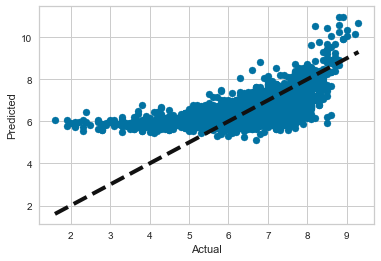

In [91]:
plt.subplots()
plt.scatter(y, model1_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [92]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.7364989608186568
variance or r-squared:  0.3397801904822666


The model clearly isn't very good, and isn't efficient either as it uses every variable in the dataset. I will use some advanced regression techniques below to hopefully make some improved models.

<b>First up is regularization with lasso.</b>

In [93]:
X2 = df[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','content_rating','actor_2_facebook_likes','budget','movie_facebook_likes','Profit','ROI']]
y2 = df['imdb_score']

In [94]:
modelclf = lm.Lasso(alpha=.4)
modelclf.fit(X2, y2)

C:\Users\Brian\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1391.7887609300294, tolerance: 0.4116327598915989
  positive)


Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [95]:


print('Coefficients: ', modelclf.coef_)
print("y-intercept: ", modelclf.intercept_)
print("R-squared: ", modelclf.score(X2,y2))



Coefficients:  [ 1.50145666e-03  1.11855233e-02  8.92778608e-06  6.35346931e-05
  7.01723576e-05 -1.66480950e-09  3.95164592e-06 -6.94713237e-05
 -0.00000000e+00 -5.29473512e-04  0.00000000e+00  7.21054330e-05
 -6.95579697e-11 -2.34343824e-06 -2.91938874e-11  1.02318897e-04]
y-intercept:  4.893520673798172
R-squared:  0.3331509263630107


In [96]:
modelclf = lm.Lasso(alpha=2)
modelclf.fit(X2, y2)

C:\Users\Brian\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1454.991455396421, tolerance: 0.4116327598915989
  positive)


Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [97]:
print('Coefficients: ', modelclf.coef_)
print("y-intercept: ", modelclf.intercept_)
print("R-squared: ", modelclf.score(X2,y2))


Coefficients:  [ 1.17670014e-03  7.24551029e-03  1.13547968e-05  5.42123824e-05
  6.46065889e-05 -1.55848279e-09  3.95061731e-06 -6.37454698e-05
 -0.00000000e+00 -4.21593669e-04  0.00000000e+00  6.73181237e-05
 -1.10160373e-10 -1.06617111e-06 -9.22126176e-11  0.00000000e+00]
y-intercept:  5.322327246973815
R-squared:  0.32349842027103937


As you can see, the r-squared values for these 2 lasso regressions are quite poor. Switching from a .4 to a 4 alpha value eliminated an additional input variable and lowered coefficient values for other variables, with only a small loss in r-squared value. 

<b>Now onto feature selection.</b>

In [98]:
X_new = SelectKBest(f_regression, k=4).fit_transform(X, y)
X_new

array([[7.23000e+02, 1.78000e+02, 8.86204e+05, 3.05400e+03],
       [3.02000e+02, 1.69000e+02, 4.71220e+05, 1.23800e+03],
       [6.02000e+02, 1.48000e+02, 2.75868e+05, 9.94000e+02],
       ...,
       [1.43000e+02, 7.70000e+01, 7.26390e+04, 3.71000e+02],
       [5.60000e+01, 8.10000e+01, 5.20550e+04, 1.30000e+02],
       [4.30000e+01, 9.00000e+01, 4.28500e+03, 8.40000e+01]])

In [99]:
selector = SelectKBest(f_regression, k=4).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[0 1 6 9]


In [100]:
X.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,actor_2_facebook_likes,budget,movie_facebook_likes,Profit,ROI
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,3.0,936.0,237000000.0,33000,523505847.0,2.208885
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,3.0,5000.0,300000000.0,0,9404152.0,0.031347


In [101]:
modelf = lm.LinearRegression()
modelf.fit(X_new, y)
modelf_y = modelf.predict(X_new)

print("mean square error: ", mean_squared_error(y, modelf_y))
print("variance or r-squared: ", explained_variance_score(y, modelf_y))

mean square error:  0.7710971921398639
variance or r-squared:  0.30876525965877843


In [102]:
print('Coefficients: ', modelf.coef_)
print("y-intercept ", modelf.intercept_)

Coefficients:  [ 1.07583848e-03  1.18503425e-02  3.42847217e-06 -5.50738820e-04]
y-intercept  4.785655203181


It does not appear that any of the models developed using regression will be very accurate for predicting movie imdb success, as this feature selection using 4 variables has an r-squared value of only .308, while the lasso model had an r-squared value of .32.

The variables selected using this technique were number of critic reviews, duration, number of user votes, and number of user reviews. 

The equation would look like: imdb_score = 0.007critic_reviews + 0.018duration + 0.0000034num_voted_users - 0.00055num_user_for_reviews.

<h2> Part 8 - Classification</h2>

<b> I will begin the classification section of the analysis by building a decision tree model.</b>

First I will sort movies into 4 "bins" by quality. This will be based on imdb score. Groupings will be imdb scores of 0-4, 4-6, 6-8, and 8-10.

In [103]:
df_class = df

In [104]:
bins = [0, 4, 6, 8, 10]
labels = [1,2,3,4]
df_class['binned'] = pd.cut(df_class['imdb_score'], bins=bins, labels=labels)

In [105]:
df_class.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit,ROI,binned
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,3.0,237000000.0,936.0,7.9,33000,523505847.0,2.208885,3
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,3.0,300000000.0,5000.0,7.1,0,9404152.0,0.031347,3
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,3.0,245000000.0,393.0,6.8,85000,-44925825.0,-0.183371,3
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,3.0,250000000.0,23000.0,8.5,164000,198130642.0,0.792523,4
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,3.0,263700000.0,632.0,6.6,24000,-190641321.0,-0.722948,3


In [106]:
#dropping non numerical values
df_class = df_class.drop(['color', 'director_name', 'actor_2_name', 'actor_1_name','movie_title','actor_3_name','plot_keywords','movie_imdb_link','language','country'], axis=1)

In [107]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3690 entries, 0 to 5042
Data columns (total 18 columns):
num_critic_for_reviews       3690 non-null float64
duration                     3690 non-null float64
director_facebook_likes      3690 non-null float64
actor_3_facebook_likes       3690 non-null float64
actor_1_facebook_likes       3690 non-null float64
gross                        3690 non-null float64
num_voted_users              3690 non-null int64
cast_total_facebook_likes    3690 non-null int64
facenumber_in_poster         3690 non-null float64
num_user_for_reviews         3690 non-null float64
content_rating               3690 non-null float64
budget                       3690 non-null float64
actor_2_facebook_likes       3690 non-null float64
imdb_score                   3690 non-null float64
movie_facebook_likes         3690 non-null int64
Profit                       3690 non-null float64
ROI                          3690 non-null float64
binned                       369

In [108]:
df_class.head(1)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit,ROI,binned
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,3.0,237000000.0,936.0,7.9,33000,523505847.0,2.208885,3


In [110]:
df_class['binned'] = df_class['binned'].astype(int)

In [111]:
y3 = df_class['binned']
X3 = df_class.drop(['imdb_score','binned'], axis=1)

In [112]:
#verifying it dropped imdb score and binned
X3.head(1)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,movie_facebook_likes,Profit,ROI
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,3.0,237000000.0,936.0,33000,523505847.0,2.208885


In [113]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=42)
# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
# Train a decision tree model
dt = dt.fit(X_train, y_train)
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [114]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

0.7190605239385727
--------------------------------------------------------
[[  0  12  15   0]
 [  0  99 209   0]
 [  0  48 677   5]
 [  0   0  22  20]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.62      0.32      0.42       308
           3       0.73      0.93      0.82       730
           4       0.80      0.48      0.60        42

    accuracy                           0.72      1107
   macro avg       0.54      0.43      0.46      1107
weighted avg       0.69      0.72      0.68      1107

--------------------------------------------------------


C:\Users\Brian\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


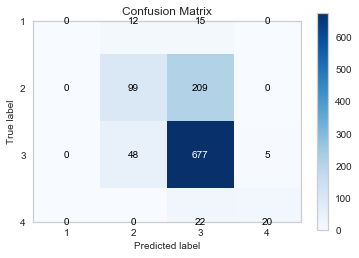

In [115]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

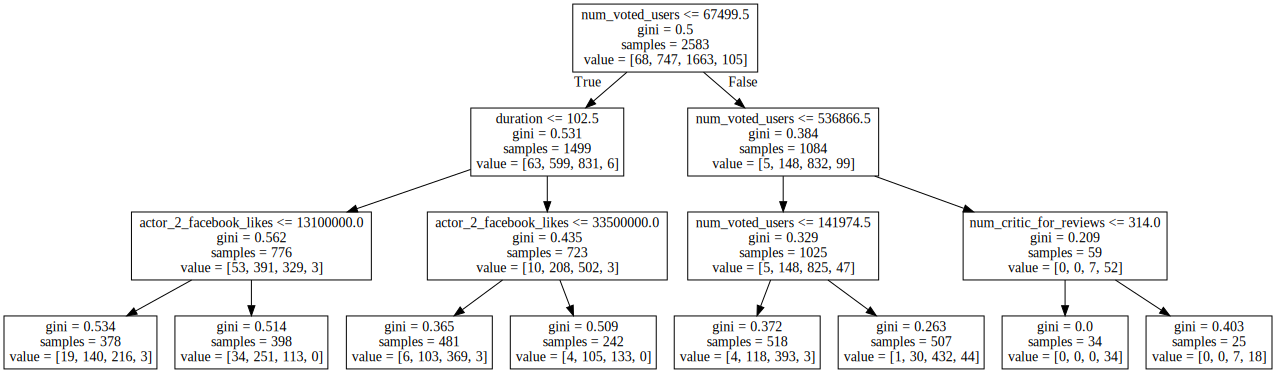

In [116]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt, out_file=None, feature_names=X.columns))

This model was able to accurately place 71.9% of movies into the correct bins. The confusion matrix created above is more interesting than the ones we created in our class assignments because it is a 4x4 grid instead of 2x2. This allows us to see different degrees of error. We would prefer to have 0 errors, but if we do have errors, we would like to see them be only 1 square off of their correct value. Only 15 of the 311 total errors were more than 1 category off (predicted as 3s and but were actually 1s), which is good.

This decision tree model is a little bit complex, but it is much more accurate than any of the regression models.

<b>Now we move on to knn:<b>

In [117]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
# split validation
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=42)
# Initialize DecisionTreeClassifier() ... name your decision model "dt"
knn = KNeighborsClassifier()
# Train a decision tree model
knn = knn.fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [118]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

0.6043360433604336
--------------------------------------------------------
[[  0   7  20   0]
 [  2  94 211   1]
 [  0 150 572   8]
 [  0   6  33   3]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.37      0.31      0.33       308
           3       0.68      0.78      0.73       730
           4       0.25      0.07      0.11        42

    accuracy                           0.60      1107
   macro avg       0.32      0.29      0.29      1107
weighted avg       0.56      0.60      0.58      1107

--------------------------------------------------------


The knn model is less accurate than the decision tree model. It only predicted 60.4% of values correctly. Many of the errors were again only one category off, which is reassuring. Only 27 were 2 or more bins off.

<b>Now on to logistic regression:</b>

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, y_train)

C:\Users\Brian\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
# print coefficients
coef = pd.DataFrame(list(zip(X.columns, np.transpose(lr.coef_))), 
             columns=['X variables', 'coef'])
coef['coef'] = coef['coef'].str[0]
coef.sort_values('coef', ascending=False)

,X variables,coef
9,num_user_for_reviews,1.131112e-07
14,Profit,1.367446e-09
5,gross,-1.775497e-08
11,actor_2_facebook_likes,-1.912241e-08
8,facenumber_in_poster,-4.648449e-08
15,ROI,-9.682445e-08
10,content_rating,-1.179775e-07
0,num_critic_for_reviews,-1.620816e-06
1,duration,-3.453563e-06
3,actor_3_facebook_likes,-9.472167e-06


In [121]:
#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))

0.6495031616982837
[[  0   2  27   0]
 [  0  13 298   1]
 [  0   8 688  30]
 [  0   0  22  18]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        29
           2       0.57      0.04      0.08       312
           3       0.66      0.95      0.78       726
           4       0.37      0.45      0.40        40

    accuracy                           0.65      1107
   macro avg       0.40      0.36      0.32      1107
weighted avg       0.61      0.65      0.55      1107



C:\Users\Brian\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


This model was more accurate than the knn model, but less accurate than the decision tree model. At about 65%, this logistic regression model is pretty good. Like the previous models, most of the errors were only 1 category off.

<b>Now on to the random forest classifier:</b>

In [122]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7416440831074977

In [123]:
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.7416440831074977
[[  0  15  14   0]
 [  0 152 160   0]
 [  0  69 648   9]
 [  0   0  19  21]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        29
           2       0.64      0.49      0.55       312
           3       0.77      0.89      0.83       726
           4       0.70      0.53      0.60        40

    accuracy                           0.74      1107
   macro avg       0.53      0.48      0.50      1107
weighted avg       0.71      0.74      0.72      1107



C:\Users\Brian\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


This model is the most accurate model I have created so far, with 74.2% accuracy. That being said, it's only a little better than the initial decision tree, which is interesting. While doing the homework and labs for classification this model was usually the best by a wide margin since it is able to average multiple decision trees.

<b>Now on to Select-K-Best (feature selection classification):</b>

In [124]:
#dropping columns with negative values as they will not work with select-k-best
X3 = X3.drop(['Profit', 'ROI'], axis=1)
X3.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,3.0,237000000.0,936.0,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,3.0,300000000.0,5000.0,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,3.0,245000000.0,393.0,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,3.0,250000000.0,23000.0,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,3.0,263700000.0,632.0,24000


In [125]:
selector = SelectKBest(chi2, k=3).fit(X3, y3)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[ 5  6 11]


Gross, num_voted_users, and budget were selected as best predictors.

In [126]:
# Build a decision tree model with those three features ... Split validation:train (70%) and test sets (30%)
# split validation
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=42)
# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt = DecisionTreeClassifier()
# Train a decision tree model
dt = dt.fit(X_train, y_train)
dt
#Model evaluation
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")

0.6838301716350497
--------------------------------------------------------
[[  4  15   8   0]
 [ 19 164 124   1]
 [ 11 137 559  23]
 [  0   1  11  30]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.12      0.15      0.13        27
           2       0.52      0.53      0.52       308
           3       0.80      0.77      0.78       730
           4       0.56      0.71      0.63        42

    accuracy                           0.68      1107
   macro avg       0.50      0.54      0.52      1107
weighted avg       0.69      0.68      0.69      1107

--------------------------------------------------------


This model is also okay at 68.4% percent accuracy. This model has more errors on the bottom lower left of the confusion score than the previous models did, which means it is predicting movies be bad when in fact they were quite highly rated.

<h2> Part 9 - Model Selection - Random Forest Classifier </h2>

I have created several models as part of this project. If I were to provide a "best model" for a prospective client I would pick the random forest classifier as it has the highest accuracy score when predicting which score category a movie would result in. It had an accuracy score of 73.8% and few egregious classifying error.

That being said, it's important to realize that the classification models get to sort of cheat when compared to the regression models. Instead of being asked to predict the correct score, they just have to predict a movie falls into a certain range of imdb scores. None of the models created will be super accurate for predicting imdb_score, but they are significantly more helpful than just guessing.

This reflects a lot of what I discovered during the mid-term project. There are not many numerical variables that are highly correlated with a high imdb score, which makes creating different models difficult. I feel as if the conclusion I came to when completing the mid-term project holds mostly true in this final project. Various models can help you predict imdb scores with decent accuracy, but selecting movies with personnel (actors and directors) with a history of success is far more likely to help predict imdb scores.

<h2>Part 10 - Clustering Analysis</h2>

In [136]:
#removing non-numerical values
df_clust = df.drop(['color', 'director_name', 'actor_2_name', 'actor_1_name','movie_title','actor_3_name','plot_keywords','movie_imdb_link','language','country'], axis=1)

In [137]:
#removing bins even though they should not be here
df_clust = df_clust.drop(['binned'], axis=1)

In [140]:
#confirming bin removal
df_clust.head(1)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit,ROI
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,3.0,237000000.0,936.0,7.9,33000,523505847.0,2.208885


In [141]:
#normalizing data
df_norm = (df_clust - df_clust.mean()) / (df_clust.max() - df_clust.min())
df_norm.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit,ROI
0,0.686104,0.245223,-0.035343,0.003621,-0.010647,0.930805,0.462122,-0.010309,-0.032022,0.537546,-0.087895,0.015588,-0.007990,0.188906,0.067835,0.040628,-0.000334
1,0.167631,0.212732,-0.010865,0.009925,0.050290,0.337645,0.216531,0.055953,-0.032022,0.178582,-0.087895,0.020745,0.021674,0.085010,-0.026721,0.000264,-0.000637
2,0.537089,0.136920,-0.035343,-0.026553,0.004978,0.193885,0.100921,0.000146,-0.008767,0.130351,-0.087895,0.016243,-0.011954,0.046049,0.216832,-0.004001,-0.000666
3,0.796941,0.194682,0.921179,0.966447,0.029978,0.520058,0.614886,0.144892,-0.032022,0.467770,-0.087895,0.016652,0.153061,0.266829,0.443193,0.015082,-0.000531
5,0.364675,0.079158,-0.014691,-0.010510,-0.011210,0.026871,0.063244,-0.014818,-0.008767,0.079748,-0.087895,0.017774,-0.010209,0.020075,0.042047,-0.015442,-0.000741


In [142]:
#confirming
df_norm.var()

num_critic_for_reviews       0.023430
duration                     0.006482
director_facebook_likes      0.018047
actor_3_facebook_likes       0.006653
actor_1_facebook_likes       0.000597
gross                        0.008473
num_voted_users              0.008102
cast_total_facebook_likes    0.000854
facenumber_in_poster         0.002271
num_user_for_reviews         0.006673
content_rating               0.072059
budget                       0.000348
actor_2_facebook_likes       0.001104
imdb_score                   0.018820
movie_facebook_likes         0.003796
Profit                       0.000331
ROI                          0.000304
dtype: float64

In [207]:
k_means = KMeans(init='k-means++', n_clusters=2, random_state=0)

In [208]:
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [209]:
# cluster labels
k_means.labels_

array([0, 0, 0, ..., 0, 1, 0])

In [210]:
# find out cluster centers
k_means.cluster_centers_

array([[-0.0005677 , -0.00265805, -0.00109142,  0.0060321 ,  0.0006168 ,
         0.02423774,  0.00137507,  0.00119434,  0.00121872,  0.00079378,
        -0.21475836,  0.00067397,  0.00074313, -0.02009995,  0.00168911,
         0.00080084, -0.00043502],
       [ 0.0006488 ,  0.00303777,  0.00124734, -0.00689383, -0.00070491,
        -0.02770028, -0.00157151, -0.00136496, -0.00139283, -0.00090717,
         0.24543812, -0.00077025, -0.00084929,  0.02297138, -0.00193041,
        -0.00091524,  0.00049717]])

In [211]:
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [212]:
df2 = df_norm.join(df1)
df2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit,ROI,cluster
0,0.686104,0.245223,-0.035343,0.003621,-0.010647,0.930805,0.462122,-0.010309,-0.032022,0.537546,-0.087895,0.015588,-0.007990,0.188906,0.067835,0.040628,-0.000334,0.0
1,0.167631,0.212732,-0.010865,0.009925,0.050290,0.337645,0.216531,0.055953,-0.032022,0.178582,-0.087895,0.020745,0.021674,0.085010,-0.026721,0.000264,-0.000637,0.0
2,0.537089,0.136920,-0.035343,-0.026553,0.004978,0.193885,0.100921,0.000146,-0.008767,0.130351,-0.087895,0.016243,-0.011954,0.046049,0.216832,-0.004001,-0.000666,0.0
3,0.796941,0.194682,0.921179,0.966447,0.029978,0.520058,0.614886,0.144892,-0.032022,0.467770,-0.087895,0.016652,0.153061,0.266829,0.443193,0.015082,-0.000531,0.0
5,0.364675,0.079158,-0.014691,-0.010510,-0.011210,0.026871,0.063244,-0.014818,-0.008767,0.079748,-0.087895,0.017774,-0.010209,0.020075,0.042047,-0.015442,-0.000741,0.0


In [213]:
df2 = df2.dropna()

In [214]:
df2.groupby('cluster').size()

cluster
0.0    1704
1.0    1414
dtype: int64

In [215]:
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit,ROI
cluster,,,,,,,,,,,,,,,,,
0.0,0.024450,0.013454,0.007809,0.008893,0.001844,0.023019,0.014566,0.003138,0.002247,0.011200,-0.040360,0.001174,0.003575,0.000732,0.005959,0.000248,-0.000567
1.0,-0.009565,-0.001939,-0.001593,-0.002983,-0.000174,-0.008166,-0.004865,-0.000465,0.000115,-0.004283,0.001685,-0.000433,-0.000583,-0.006762,-0.002996,-0.000072,-0.000461


<b>Profiling each cluster:</b>
Cluster 0 has a higher amount of critical reviews, a longer duration, more director facebook likes, more third actor facebook likes, more lead actor facebook likes, a higher gross, more users voted, more total cast facebook likes, more faces in its poster, more user reviews, a lower content rating, a higher budget, more second actor facebook likes, higher imdb score, higher profit, and a slighly lower ROI value.

Cluster 1 would have the opposite of those characteristics.

What is interesting about these profiles is that they seem to confirm what we've already discovered. The clustering algorithm finds more significant differences between these 2 clusters in tons of variables <i>other</i> than IMDB score. IMDB scores just do not have very significant correlations to any of the numerical variables we have analyzed.

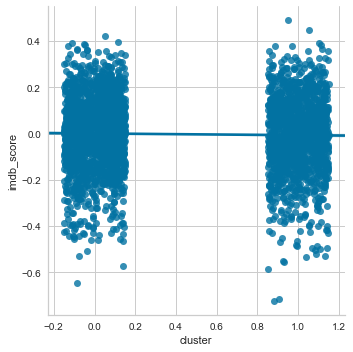

In [218]:
#visualizing difference in imdb score
sns.lmplot("cluster", "imdb_score", df2, x_jitter=.15, y_jitter=.15);

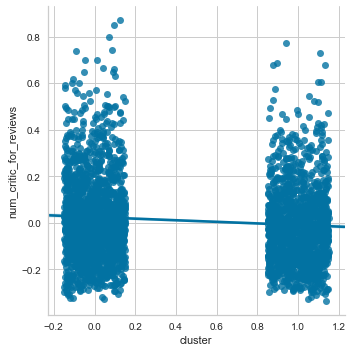

In [219]:
sns.lmplot("cluster", "num_critic_for_reviews", df2, x_jitter=.15, y_jitter=.15);

The most stark difference between the 2 clusters is number of critical reviews. What I think the algorithm is detecting here is a difference in popularity of movies. Cluster 0 has the biggest differences with regards to critical reviews, gross, and facebook likes. So instead of any meaningful clustering with regards to score, there's meaningful clustering relating to movie popularity.

<b>Now to creating a decision tree:</b>

In [220]:
y = df2['cluster'].values
X = df2.drop(['cluster'], axis=1)

In [221]:
# instantiate a decision tree model, and fit with X and y (no split validation needed)
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Train a decision tree model
dt = dt.fit(X,y)

In [222]:
predicted_Y = dt.predict(X)
print (predicted_Y)

[0. 0. 0. ... 1. 1. 1.]


In [224]:
from sklearn.externals.six import StringIO

#!pip install pydotplus
import pydotplus

dot_data = StringIO() 
tree.export_graphviz(dt, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("data/dt.pdf")
# go to data folder and open the pdf file

True

In [225]:
from IPython.display import IFrame
IFrame('data/dt.pdf', width=1000, height=500)

In [226]:
print(metrics.classification_report(y, dt.predict(X)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y, dt.predict(X)))
print("--------------------------------------------------------")
print(metrics.accuracy_score(y, dt.predict(X)))

              precision    recall  f1-score   support

         0.0       0.68      0.60      0.64      1704
         1.0       0.58      0.66      0.61      1414

    accuracy                           0.63      3118
   macro avg       0.63      0.63      0.63      3118
weighted avg       0.63      0.63      0.63      3118

--------------------------------------------------------
[[1024  680]
 [ 485  929]]
--------------------------------------------------------
0.6263630532392559


This decision tree model is not perfect, with an accuracy score of only 62.6% (this could be increased with more leafs and higher depth). Interestingly, the tree uses budget for several of it's decision nodes. That surprised me.

<b>Now Random Forest Classifier:</b>

In [227]:
# build randomforeastmodel
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X, y)
clf.score(X,y)

0.9961513790891597

<b>Feature Importance:</b>

In [228]:
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})

,feature,importance
0,num_critic_for_reviews,0.062755
1,duration,0.057174
2,director_facebook_likes,0.057818
3,actor_3_facebook_likes,0.060988
4,actor_1_facebook_likes,0.053287
5,gross,0.074100
6,num_voted_users,0.071164
7,cast_total_facebook_likes,0.062622
8,facenumber_in_poster,0.026698
9,num_user_for_reviews,0.061667


Many variables here have the same value of around .06 to .07 relating to how important they are for clustering via decision tree, but budget stands out at .097 - which fits with the decision tree we made.

<b>Agglomerative Clustering:</b>

In [229]:
np.random.seed(1) # setting random seed to get the same results each time.
agg= AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
agg.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

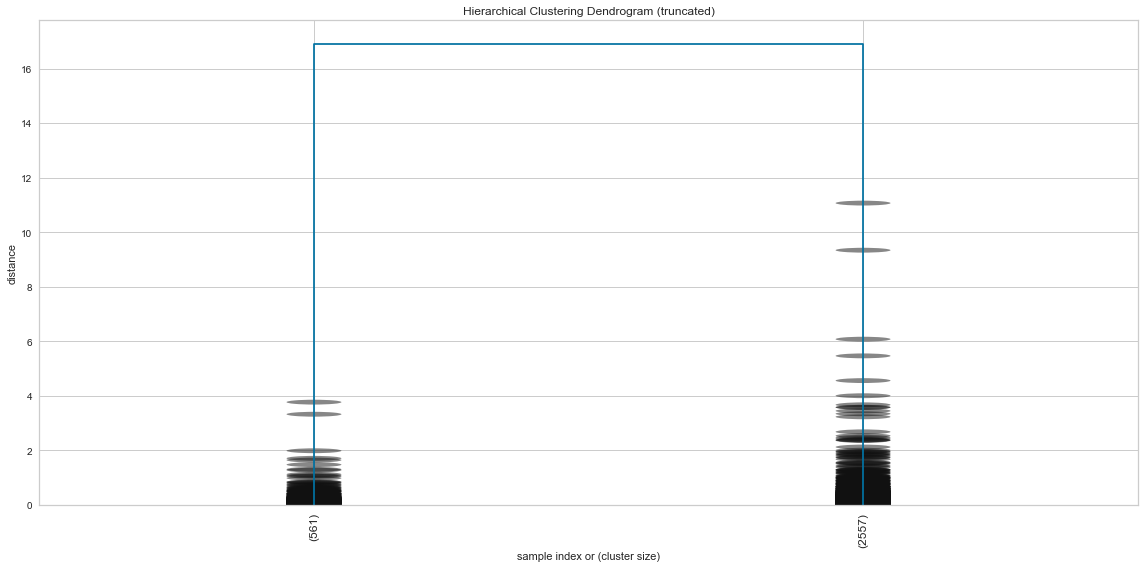

In [230]:
plt.figure(figsize=(16,8))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=2,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

In [231]:
df_copy1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df_copy1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [234]:


df_copy2 = df_norm.join(df_copy1)
df_copy2.head()



,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit,ROI,cluster
0,0.686104,0.245223,-0.035343,0.003621,-0.010647,0.930805,0.462122,-0.010309,-0.032022,0.537546,-0.087895,0.015588,-0.007990,0.188906,0.067835,0.040628,-0.000334,0.0
1,0.167631,0.212732,-0.010865,0.009925,0.050290,0.337645,0.216531,0.055953,-0.032022,0.178582,-0.087895,0.020745,0.021674,0.085010,-0.026721,0.000264,-0.000637,0.0
2,0.537089,0.136920,-0.035343,-0.026553,0.004978,0.193885,0.100921,0.000146,-0.008767,0.130351,-0.087895,0.016243,-0.011954,0.046049,0.216832,-0.004001,-0.000666,0.0
3,0.796941,0.194682,0.921179,0.966447,0.029978,0.520058,0.614886,0.144892,-0.032022,0.467770,-0.087895,0.016652,0.153061,0.266829,0.443193,0.015082,-0.000531,0.0
5,0.364675,0.079158,-0.014691,-0.010510,-0.011210,0.026871,0.063244,-0.014818,-0.008767,0.079748,-0.087895,0.017774,-0.010209,0.020075,0.042047,-0.015442,-0.000741,0.0


In [235]:
df_copy2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit,ROI
cluster,,,,,,,,,,,,,,,,,
0.0,0.015882,0.009238,0.007566,0.004002,0.001103,0.014734,0.008951,0.001830,0.000399,0.006564,-0.032118,0.000775,0.002230,-0.003489,0.004196,0.000136,-0.000539
1.0,0.021259,0.011233,0.002005,0.011891,0.004122,0.021400,0.014686,0.005653,0.001375,0.013320,-0.043947,0.001228,0.004372,-0.004318,0.002768,0.000100,-0.000586


Cluster 0: has lower number of critical reviews, lower duration, more director facebook likes, fewer third actor facebook likes, fewer lead actor facebook likes, lower gross, lower number of votes, lower number of cast facebook likes, fewer face numbers in the movie poster, lower number of user reviews, a higher content rating, lower budget, fewer second actor facebook likes, higher imdb score, more movie facebook likes, slightly higher profit and slightly higher ROI.

Cluser 1 has the opposite of those characteristics.

In [236]:
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit,ROI
cluster,,,,,,,,,,,,,,,,,
0.0,0.024450,0.013454,0.007809,0.008893,0.001844,0.023019,0.014566,0.003138,0.002247,0.011200,-0.040360,0.001174,0.003575,0.000732,0.005959,0.000248,-0.000567
1.0,-0.009565,-0.001939,-0.001593,-0.002983,-0.000174,-0.008166,-0.004865,-0.000465,0.000115,-0.004283,0.001685,-0.000433,-0.000583,-0.006762,-0.002996,-0.000072,-0.000461


The clustering analysis is largely similar between the 2 methods regarding the different variables. Cluster 0 in hierarchical and cluster 0 in k-means both cluster their groups largely relating to facebook likes and number of reviews, though cluster 0 in hierarchical does not do so with director likes, which is the largest difference between the 2 groups.

<h2>Part 11 - Conclusion</h2>

Many of the takeaways from the first half of the project (due at mid-term) remain the same after doing the final analysis. Here are the most important points:

* Predicting a movie's IMDB score is difficult. 
* The models created in this analysis using regression had poor r-squared scores, indicating they were not very accurate. 
* The classification models were better with regards to accuracy, but they are less precise - predicting within a range of score (like 6-8/10) - rather than a specific score.


* Important variables such as actor or director are very difficult to integrate into models due to them being non-numerical values. 
* The clustering analysis detected some interesting segments within the dataset, but these divisions did not relate to IMDB score in a significant way.
* Random forest classifiers regularly have good accuracy scores.

To conclude, using various models and clustering analysis can be useful for gaining an insight into what results in a movie having a higher imdb score, but they are not as useful as one would hope.